In [1]:
from random import shuffle
import glob
import tensorflow as tf
from sklearn.externals import joblib
import numpy as np
from sklearn import preprocessing
import uuid
import cv2
from tensorflow.keras.preprocessing.image import random_shift, random_zoom, random_rotation
import sys
from os import listdir
from os.path import isfile, join
import os
import matplotlib.pyplot as plt

import keras

from keras.callbacks import Callback

from keras import backend as K
from keras import layers

from tensorflow.keras.preprocessing.image import random_shift, random_zoom, random_rotation

In [3]:
  # shuffle the addresses before saving
cat_dog_train_path = r'D:\imageRecognition\fecredit\image parts\*.jpg'

In [4]:
cat_dog_train_path = r'C:\Users\odkon\fecredit\augmented\*.jpg'

In [5]:
augmented_path = r'C:\Users\odkon\fecredit\augmented'

In [6]:
dir_parts = r'D:\imageRecognition\fecredit\image parts'

onlyfiles = [f for f in listdir(dir_parts) if isfile(join(dir_parts, f))]

In [7]:
def train_preprocess(image):   

    new = random_zoom(
        image,
        (np.random.uniform(low=0.6, high=1.5), np.random.uniform(low=0.6, high=1.5)),
        row_axis=0,
        col_axis=1,
        channel_axis=2,
        fill_mode='nearest',
        cval=0.0,
        interpolation_order=1
    )

    new = random_rotation(
        new,
        50,
        row_axis=0,
        col_axis=1,
        channel_axis=2,
        fill_mode='nearest',
        cval=0.0,
        interpolation_order=1
    )

    new=random_shift(
        new,
        0.45,
        0.45,
        row_axis=0,
        col_axis=1,
        channel_axis=2,
        fill_mode='nearest',
        cval=0.0,
        interpolation_order=1
    )

    # Other transformations...
    return new

In [146]:
file_name=onlyfiles[0]

In [149]:
image = cv2.imread(os.path.join(dir_parts,file_name))

In [150]:
image.shape

(31, 25, 3)

In [686]:
for file_name in onlyfiles:

    image = cv2.imread(os.path.join(dir_parts,file_name))
    
    print(file_name)

    image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #image = cv2.resize(image, (40, 40))

    plt.imsave(os.path.join(augmented_path, file_name), image , cmap = plt.cm.gray)

    image = image.reshape([image.shape[0], image.shape[1],1])

    for i in np.arange(250):
        new = train_preprocess(image)
        new = new.reshape([new.shape[0], new.shape[1]])
        plt.imsave(os.path.join(augmented_path,'{}_{}.jpg'.format(file_name[:3],uuid.uuid4())), new , cmap = plt.cm.gray)

t_0_062f54cd-f91b-4a07-a883-2d46c9328aef.jpg
t_0_095b4375-f299-487c-8359-4f266bdbfd91.jpg
t_0_1dacca38-d7f8-407d-89cd-47dc32375ac2.jpg
t_0_224115a9-18bf-4f9f-95db-7d7aa8b9ffa6.jpg
t_0_2bb3b26d-556e-475b-b793-3820452000f3.jpg
t_0_36bc6451-5fad-46e7-b27d-2007d681b742.jpg
t_0_37807279-b346-47df-ae9b-93cc37e9496d.jpg
t_0_3c8bb706-6795-4ea0-bdad-2fea64855b41.jpg
t_0_3fb914e6-80c4-4ee5-848e-f93984f34397.jpg
t_0_435e492b-af3d-4e29-96cf-a7b7f13e271e.jpg
t_0_44494495-414c-40ab-b50e-48d408cc8758.jpg
t_0_54f3fdf4-a93a-491b-8e04-19ae02fcd178.jpg
t_0_5f616bd0-a44a-4254-bb43-368547770607.jpg
t_0_61dad696-5027-4130-9d75-a984b2c7ac3a.jpg
t_0_7394d940-b7ea-4071-abd0-e1d1876b90f8.jpg
t_0_803747ba-6dfa-4a56-be75-059dc37eaf82.jpg
t_0_881268bd-fd90-4c3c-b35f-a32f3fa00391.jpg
t_0_8d499749-9b67-4158-9123-762a8bdd98d8.jpg
t_0_a9e6ea5c-c493-4b8d-a3b1-924cc44aa3b9.jpg
t_0_ae1a4682-16f5-484c-95aa-345de511568f.jpg
t_0_b0565a37-27ec-43f1-96f4-e6b0dcea4bda.jpg
t_0_b142632b-069e-49f6-aac7-cfb41a1717ce.jpg
t_0_b5875a

t_4_b5dcbd30-4434-4e46-a2cf-673720b5cc41.jpg
t_4_bbf4cf79-97b0-42ac-97cb-2415198de3df.jpg
t_4_bc13c681-44ac-4026-ad31-234954cd7b5a.jpg
t_4_c136e8de-dcd8-4f6f-9504-6d208a689f45.jpg
t_4_d226bc0a-8028-4db5-9d1a-71bc31e5b457.jpg
t_4_d3fceeee-df15-4fd6-b8e8-6ffd68a9f715.jpg
t_4_d64911af-aecd-47b7-b240-4303a108e897.jpg
t_4_e09b2100-455b-4947-97a1-9209d5b39001.jpg
t_4_e1fbd0e0-55b2-4824-a2ff-a4dbf6dc1031.jpg
t_4_e68f5b6f-dd2d-43a2-9995-9fb897c76973.jpg
t_4_ed4da539-173b-47ae-ab5b-2e6e6d47309a.jpg
t_4_eebeb7a6-52d0-4872-bfec-7e5359db1cf6.jpg
t_4_f0a12760-78c2-4fbe-a722-b2371efa16ef.jpg
t_4_f81cc14b-f4b2-4edd-be81-d74bd585f802.jpg
t_4_f9a186af-83ac-4578-8433-3145717ed4f2.jpg
t_5_0a39803b-8aec-4295-881f-e7dc3ba3c006.jpg
t_5_0d7f0f72-8b50-48cc-a098-6c01d5c2b7c7.jpg
t_5_0e8452fc-1006-4b69-ba43-6ae54598ea54.jpg
t_5_0ff03f4c-d4e5-4110-ba49-b62b5593c58d.jpg
t_5_11122aeb-902e-419f-8b4e-92ed6d040646.jpg
t_5_1394b1f8-57fc-4aa7-8312-32e5860972c7.jpg
t_5_1802e240-3419-4d5f-beb0-a3b56f56e9aa.jpg
t_5_2813f3

t_9_214c5701-a44c-40f2-b21e-189fb17ab4a1.jpg
t_9_2395c913-e785-4d02-997d-88f7d2743abc.jpg
t_9_25e216a7-a40a-4f6d-871d-09c2e942904b.jpg
t_9_2783d4b9-2541-4d24-be15-e68cbcc4a27b.jpg
t_9_27c2faaf-aa96-473a-93b0-f34cd41b849e.jpg
t_9_2ad4ca67-2416-4346-8ce5-19e2e62facf7.jpg
t_9_323c638e-c985-4a02-83e6-6824efceff55.jpg
t_9_362f0f75-c170-4b9e-afd8-a78b874d6986.jpg
t_9_371ce5e8-90fc-473c-84c2-ecebbe9c0ab4.jpg
t_9_3fab492d-1307-4079-a2d0-7bb35d7575aa.jpg
t_9_41e025d7-447d-4eef-a6a4-e970a0a45d43.jpg
t_9_430d282d-62ee-44ff-962a-773eecf2a034.jpg
t_9_441425f3-b51c-48b3-bd9d-3266737a4be2.jpg
t_9_4bd653a3-baa1-4d85-8e3a-6367ec565488.jpg
t_9_53442172-6d77-4a78-a74d-154433729617.jpg
t_9_537b20b8-a085-492b-bf5d-d2160a53a8ce.jpg
t_9_66c2bab7-c671-45e3-8cf7-6d91c26a6467.jpg
t_9_67228a09-6420-4306-b4d7-63d41c7cfd0e.jpg
t_9_750a961e-4e23-4916-b1e7-ec8189ef3607.jpg
t_9_7d6ee00e-c304-40ae-8cc8-5b9bd4d8c70b.jpg
t_9_8c9753a6-c1ec-49ba-8273-8910c5745790.jpg
t_9_8e2ec1a2-9c77-4e7d-9fa3-b3916c4dbfcf.jpg
t_9_8e5bd3

t_D_6183bb14-1382-4496-8cff-ba4d6b389c5c.jpg
t_D_62ead05a-43c4-427b-9709-cfce1e7a5c0e.jpg
t_D_63554364-e7cd-47a5-b87a-05ea1a34355b.jpg
t_D_6a6797b0-10cd-4fc5-b9b4-77b6290c8e24.jpg
t_D_6ccabad1-3b17-42e2-b757-b296c5416c7d.jpg
t_D_6ce01be1-2889-45ea-9dc0-a327a84013bf.jpg
t_D_6f4b86af-01c7-44f4-ab8a-34631c2094bb.jpg
t_D_70f18401-9b44-4174-9072-1468b4732481.jpg
t_D_7588e138-b04e-4004-9c28-0eed82e49fb2.jpg
t_D_780c6202-27e7-46ef-a640-8bcf705372eb.jpg
t_D_9714ad5e-4ec2-4052-b9a3-fe1b632d143e.jpg
t_D_97a40774-1ff8-4b09-aa79-26e54bc952e1.jpg
t_D_9b24f018-f95a-4aa7-9f80-906dd943a288.jpg
t_D_ab75dee6-35ec-4446-9bc4-3db1c95c02aa.jpg
t_D_b30764d7-0f98-46aa-a19f-7218f876b969.jpg
t_D_ba29e0d2-053f-473a-8508-d2103d7c6379.jpg
t_D_cb4aa9f1-54e8-42b1-b941-88e0033d062c.jpg
t_D_d25ab112-3e15-4b97-986d-b52a0730659e.jpg
t_D_e67f71fe-f7f2-4ed1-8359-804c162d6886.jpg
t_D_ec68216b-fe18-437f-941c-ffb69055868b.jpg
t_D_f2dec5b3-ce73-4248-8368-6d339e565d38.jpg
t_D_f579e220-5ef7-40ee-b121-adc2d9aed21e.jpg
t_D_f69662

t_H_8fa465f7-9ec8-40db-b47f-08558e08593d.jpg
t_H_90613996-3665-4af4-94a4-f11ab4822a5c.jpg
t_H_990d0ff8-e464-4bd5-8589-839a56454399.jpg
t_H_9e0ed5b4-527d-4450-8434-abc4f01a3bdd.jpg
t_H_9e3835b7-9de6-4f50-bb53-2360f163a063.jpg
t_H_a01a60a4-8587-4639-a344-06948f3a0193.jpg
t_H_b412a3e0-866d-4d56-9f60-4d82efc0f27f.jpg
t_H_b5e81faa-ed20-4ed9-9bea-90dc019532ee.jpg
t_H_bd484475-8d13-48d7-aa8f-388bd644704b.jpg
t_H_c4ec7746-8022-4ca4-8779-894a68c2f76d.jpg
t_H_d2ee25e3-6148-474c-845f-35f611ca96d9.jpg
t_H_d9583051-d3c1-41a4-a875-271ae0072274.jpg
t_H_dcd4a66a-46e5-4ee2-89c9-221eb552c58b.jpg
t_H_f9dc42c3-19b6-44e3-a581-242dc3a4c77d.jpg
t_I_0cfafe4f-41a5-4c61-8445-28328889de40.jpg
t_I_0d6c67c3-ff90-4e16-9c4b-ee3ee10bd7ad.jpg
t_I_0e96ca62-0376-48b5-9594-53a4616fcedb.jpg
t_I_135f280e-f65e-4dec-8766-304951f1d190.jpg
t_I_16c84a17-5155-4264-be74-fcdede09dce1.jpg
t_I_17821f9d-16f0-46aa-acf3-1b431dd6cfb0.jpg
t_I_185681b6-1828-43cf-9db2-3457db389edd.jpg
t_I_1a2dd15a-48b0-4d40-b08a-65596d090dd4.jpg
t_I_25fb27

t_M_293706a3-0448-4206-8024-91fdb2c56f9b.jpg
t_M_2ebbcf65-7dde-4b5f-8e90-9b64fdf88695.jpg
t_M_33e60171-bab8-495d-97fe-bb301a08a0ad.jpg
t_M_3867a797-cb72-4d36-8890-12143c20a563.jpg
t_M_40767648-6f08-4af0-b80c-105ee34d903c.jpg
t_M_4c9fe12f-3d95-49e0-aa29-1044dcb31282.jpg
t_M_4df80e88-80cc-4c0d-899e-c5e66eed0e67.jpg
t_M_4f8bf00d-b3bf-432f-90f1-e0955e379dbd.jpg
t_M_50f09015-3ece-4d5f-a80e-a01504300a2e.jpg
t_M_68e8eb2b-f05a-4a25-a43b-820553d8b6dc.jpg
t_M_6d5235cf-7ce4-4930-b02d-a8ab82b3a5c0.jpg
t_M_75537a51-6da7-41d2-8d10-c2a43e78f2f9.jpg
t_M_761f441a-a7dd-44cb-8051-877e05f941de.jpg
t_M_7a264bdf-429f-47ac-acca-a75452ca3a80.jpg
t_M_7a7779ae-f78b-4660-aa1e-c04d84512639.jpg
t_M_8cb08050-9824-4dd3-9797-9121d53358e2.jpg
t_M_8d35a271-5031-404d-84a1-10e8736b9924.jpg
t_M_8e9fefb7-be63-4cd7-a48c-970f7de93938.jpg
t_M_920b6ea8-a963-4d79-8560-672f45c20e01.jpg
t_M_94f3c107-e60b-4398-bd6d-ca5a648eb8f1.jpg
t_M_96d406b8-faeb-4871-a9fb-195269c4e806.jpg
t_M_97754553-679b-4d68-9dcd-726d915079ed.jpg
t_M_a6649a

t_Q_0be7e14c-ade5-4ed2-b0bd-9bc705c5bde5.jpg
t_Q_0ee78c39-c1d4-4b5c-a3ad-def9c813c65c.jpg
t_Q_27522bc3-85af-4940-bfee-bbb5abc764a6.jpg
t_Q_2abde79a-b844-4c71-967a-c8479052840f.jpg
t_Q_2cf211dd-d503-4174-8c31-0915f971c7e1.jpg
t_Q_2ee5c139-a69e-46e6-b910-065e633c16a8.jpg
t_Q_30f7e54e-fce9-487f-a3b7-09c56dc239f9.jpg
t_Q_34702486-b065-4b12-93d5-ddf445968329.jpg
t_Q_34b03f74-07bb-4a75-81d4-c96e93efbc8f.jpg
t_Q_35a717c1-f5bb-4198-a27e-827dac39ea28.jpg
t_Q_37c6466e-6484-42d9-b689-d10de1226d21.jpg
t_Q_4079d092-6e44-46ab-aa8f-0fe89e8c4449.jpg
t_Q_49c42e4a-1694-4fc7-b6ad-248ab743a454.jpg
t_Q_52dcc681-290e-4590-add2-5f24aecdc0ee.jpg
t_Q_628fe1b2-1257-4837-8014-e2792e14bc7a.jpg
t_Q_639445ee-f363-4c33-9e6d-83220712e0e7.jpg
t_Q_63beedff-184e-47c1-9290-0df9eae9b03a.jpg
t_Q_6648e509-72ca-44e9-9197-f0ddded82921.jpg
t_Q_6cb15460-b9f7-44e1-8375-3bce4c07b6cf.jpg
t_Q_7dd0c030-f5fb-4642-8725-f193f3dbd460.jpg
t_Q_82d117af-640c-468d-96ac-1ee9771fc80e.jpg
t_Q_830d91f6-9d1f-446f-8da8-8a5c30f168ec.jpg
t_Q_8f8537

t_U_d52e9e64-0cfa-4238-9c94-7fce17a5b3db.jpg
t_U_d57aad45-0048-4ab1-8f0f-96f8fcf3e94e.jpg
t_U_dcac74b8-cc02-49a1-9b7b-44f3db03479d.jpg
t_U_e1d701f4-e749-4532-b386-a36a226e6270.jpg
t_U_e4035a3c-be28-43ad-ad72-d523efa2f76b.jpg
t_U_f2e8f325-bccc-4ca7-8d5d-7aa174bc19a1.jpg
t_U_f7241fce-5602-4a8d-9e90-3a55577917c6.jpg
t_U_f84ea153-2037-4360-a2f5-389ab0c6bcfb.jpg
t_U_f9860d4c-983d-4112-b083-dc40a1f82b03.jpg
t_V_040f53c4-bc14-47f2-ada6-e6469180864d.jpg
t_V_0579e28e-2eb3-4c9b-911c-b28bab1c6077.jpg
t_V_06ec7c4a-229b-42fe-aa10-f69dac523f67.jpg
t_V_072d21c5-cdd0-4530-bfba-7daa0736d279.jpg
t_V_0ea26337-a142-4b09-be63-02349d24d33b.jpg
t_V_15331595-d073-4c05-a34d-834731976f5f.jpg
t_V_1e77d95c-1ae5-4642-9b4a-36793c76eaaf.jpg
t_V_26a2893b-5158-406f-9faa-f5f1f0c053ce.jpg
t_V_2a6aa735-4b8a-461b-94f7-aca3bb2d0c00.jpg
t_V_32abce7a-60c0-4a3f-bf28-3df2aa3125e7.jpg
t_V_3adbb7ab-c45b-470a-8f79-9fe87ac3ae4f.jpg
t_V_44507ced-dc2f-41db-94bf-5bf4283568a7.jpg
t_V_4c6d3863-edfb-4843-89d9-c9fcbf06c581.jpg
t_V_53551e

In [8]:
addrs = glob.glob(cat_dog_train_path)

In [9]:
labels_basic = [addr.split("\\")[-1][2:3] for addr in addrs]

In [10]:
le = preprocessing.LabelEncoder()

In [11]:
le.fit(labels_basic)

LabelEncoder()

In [12]:
_ = joblib.dump(le, r'D:\imageRecognition\labelencoder.joblib', compress=9)

In [174]:
le.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'], dtype='<U1')

In [151]:
img = load_image(train_addrs[0])

In [152]:
img.shape

(40, 40)

In [13]:
labels = le.transform(labels_basic) 

In [14]:
# read addresses and labels from the 'train' folder
  # 0 = Cat, 1 = Dog
# to shuffle data
if shuffle_data:
    c = list(zip(addrs, labels))
    shuffle(c)
    addrs, labels = zip(*c)
    
# Divide the hata into 60% train, 20% validation, and 20% test
train_addrs = addrs[0:int(0.8*len(addrs))]
train_labels = labels[0:int(0.8*len(labels))]
test_addrs = addrs[int(0.8*len(addrs)):]
test_labels = labels[int(0.8*len(labels)):]

In [15]:
len(train_addrs)

289754

In [176]:
from absl import app as absl_app 

In [23]:
w, h = 40,40

In [177]:
def load_image(addr):
    # read an image and resize to (224, 224)
    # cv2 load images as BGR, convert it to RGB
    img = cv2.imread(addr)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (w, h), interpolation=cv2.INTER_CUBIC)
    img = img.astype(np.float32)
    return img

In [178]:
img = load_image(train_addrs[i])

In [179]:
img

array([[ 94.,  66.,  72., ..., 254., 254., 254.],
       [ 59.,  65.,  99., ..., 255., 255., 255.],
       [ 61.,  93., 141., ..., 255., 255., 255.],
       ...,
       [222., 225., 222., ..., 247., 247., 247.],
       [219., 224., 223., ..., 247., 247., 247.],
       [221., 223., 222., ..., 247., 247., 247.]], dtype=float32)

In [119]:
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [120]:
train_filename = r'C:\Users\odkon\fecredit\tfrecords\train_1.tfrecords' # address to save the TFRecords file
# open the TFRecords file
writer = tf.python_io.TFRecordWriter(train_filename)

j=1
for i in range(len(train_addrs)):
    # print how many images are saved every 1000 images
    if not i % 100000:
        print('Train data: {}/{}'.format(i, len(train_addrs)))
        writer.close()
        train_filename = r'C:\Users\odkon\fecredit\tfrecords\train_{}.tfrecords'.format(j)  # address to save the TFRecords file
        # open the TFRecords file
        writer = tf.python_io.TFRecordWriter(train_filename)
        j=j+1
        sys.stdout.flush()
    # Load the image
    
    if not i % 10000:
        print(i)
    img = load_image(train_addrs[i])
    label = train_labels[i]
    # Create a feature
    feature = {'label': _int64_feature(label),
               'image': _bytes_feature(tf.compat.as_bytes(img.tostring()))}
    # Create an example protocol buffer
    example = tf.train.Example(features=tf.train.Features(feature=feature))
    
    # Serialize to string and write on the file
    writer.write(example.SerializeToString())
    
writer.close()
sys.stdout.flush()

Train data: 0/289754
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
Train data: 100000/289754
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
Train data: 200000/289754
200000
210000
220000
230000
240000
250000
260000
270000
280000


In [121]:
train_filename = r'C:\Users\odkon\fecredit\tfrecords\test_1.tfrecords' # address to save the TFRecords file
# open the TFRecords file
writer = tf.python_io.TFRecordWriter(train_filename)

j=1
for i in range(len(test_addrs)):
    # print how many images are saved every 1000 images
    if not i % 100000:
        print('Train data: {}/{}'.format(i, len(test_addrs)))
        writer.close()
        train_filename = r'C:\Users\odkon\fecredit\tfrecords\test_{}.tfrecords'.format(j)  # address to save the TFRecords file
        # open the TFRecords file
        writer = tf.python_io.TFRecordWriter(train_filename)
        j=j+1
        sys.stdout.flush()
    # Load the image
    
    if not i % 10000:
        print(i)
    img = load_image(test_addrs[i])
    label = test_labels[i]
    # Create a feature
    feature = {'label': _int64_feature(label),
               'image': _bytes_feature(tf.compat.as_bytes(img.tostring()))}
    # Create an example protocol buffer
    example = tf.train.Example(features=tf.train.Features(feature=feature))
    
    # Serialize to string and write on the file
    writer.write(example.SerializeToString())
    
writer.close()
sys.stdout.flush()

Train data: 0/72439
0
10000
20000
30000
40000
50000
60000
70000


In [122]:
def _parse_function(proto):
    # define your tfrecord again. Remember that you saved your image as a string.
    keys_to_features = {'image': tf.FixedLenFeature([], tf.string),
                        'label': tf.FixedLenFeature([], tf.int64)}
    
    # Load one example
    parsed_features = tf.parse_single_example(proto, keys_to_features)
    
    # Turn your saved image string into an array
    parsed_features['image'] = tf.decode_raw(parsed_features['image'], tf.float32)
    
    parsed_features['image'] = tf.reshape(parsed_features['image'], [-1, h, w, 1])
    parsed_features['label'] = tf.cast(parsed_features['label'],  tf.int64)
    
    return parsed_features['image'], parsed_features['label']

In [123]:
NUM_CLASSES = 35
SUM_OF_ALL_DATASAMPLES=100000
BATCHSIZE=128
STEPS_PER_EPOCH= SUM_OF_ALL_DATASAMPLES / BATCHSIZE

def create_dataset(filepath,BATCH_SIZE=128,SHUFFLE_BUFFER=20000):
    
    # This works with arrays as well
    dataset = tf.data.TFRecordDataset(filepath)
    
    # Maps the parser on every filepath in the array. You can set the number of parallel loaders here
    dataset = dataset.map(_parse_function, num_parallel_calls=4)
    
    # This dataset will go on forever
    dataset = dataset.repeat()
    
    # Set the number of datapoints you want to load and shuffle 
    dataset = dataset.shuffle(SHUFFLE_BUFFER)
    
    # Set the batchsize
    dataset = dataset.batch(BATCH_SIZE)
    
    # Create an iterator
    iterator = dataset.make_one_shot_iterator()
    
    # Create your tf representation of the iterator
    image, label = iterator.get_next()

    # Bring your picture back in shape
    
    image = tf.reshape(image, [-1, 40, 40, 1])

    # Create a one hot array for your labels
    label = tf.one_hot(label, NUM_CLASSES)
    
    return image, label

In [136]:
class EvaluateInputTensor(Callback):
    """ Validate a model which does not expect external numpy data during training.

    Keras does not expect external numpy data at training time, and thus cannot
    accept numpy arrays for validation when all of a Keras Model's
    `Input(input_tensor)` layers are provided an  `input_tensor` parameter,
    and the call to `Model.compile(target_tensors)` defines all `target_tensors`.
    Instead, create a second model for validation which is also configured
    with input tensors and add it to the `EvaluateInputTensor` callback
    to perform validation.

    It is recommended that this callback be the first in the list of callbacks
    because it defines the validation variables required by many other callbacks,
    and Callbacks are made in order.

    # Arguments
        model: Keras model on which to call model.evaluate().
        steps: Integer or `None`.
            Total number of steps (batches of samples)
            before declaring the evaluation round finished.
            Ignored with the default value of `None`.
    """

    def __init__(self, model, steps, metrics_prefix='val', verbose=1):
        # parameter of callbacks passed during initialization
        # pass evalation mode directly
        super(EvaluateInputTensor, self).__init__()
        self.val_model = model
        self.num_steps = steps
        self.verbose = verbose
        self.metrics_prefix = metrics_prefix

    def on_epoch_end(self, epoch, logs={}):
        self.val_model.set_weights(self.model.get_weights())
        results = self.val_model.evaluate(None, None, steps=int(self.num_steps),
                                          verbose=self.verbose)
        metrics_str = '\n'
        for result, name in zip(results, self.val_model.metrics_names):
            metric_name = self.metrics_prefix + '_' + name
            logs[metric_name] = result
            if self.verbose > 0:
                metrics_str = metrics_str + metric_name + ': ' + str(result) + ' '

        if self.verbose > 0:
            print(metrics_str)

In [124]:
def cnn_layers(x_train_input):
    x = layers.Conv2D(32, (3, 3),
                      activation='relu', padding='valid')(x_train_input)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x_train_out = layers.Dense(NUM_CLASSES,
                               activation='softmax',
                               name='x_train_out')(x)
    return x_train_out

In [141]:
epochs = 15

capacity = 10000
min_after_dequeue = 3000
enqueue_many = True

filepath=[r'C:\Users\odkon\fecredit\tfrecords\train_1.tfrecords',r'C:\Users\odkon\fecredit\tfrecords\train_2.tfrecords',r'C:\Users\odkon\fecredit\tfrecords\train_3.tfrecords']

In [139]:
K.clear_session()
sess = K.get_session()
#Get your datatensors
image, label = create_dataset(filepath)

image_shape = image.get_shape().as_list()
label_shape = label.get_shape().as_list()

print(image_shape)
print(label_shape)

model_input = layers.Input(tensor=image)
model_output = cnn_layers(model_input)
train_model = keras.models.Model(inputs=model_input, outputs=model_output)

# Pass the target tensor `y_train_batch` to `compile`
# via the `target_tensors` keyword argument:
#Compile your model
train_model.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'],
                   target_tensors=[label])
train_model.summary()

[None, 40, 40, 1]
[None, 35]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 40, 40, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 38, 38, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)       

In [140]:
filepath_test=[r'C:\Users\odkon\fecredit\tfrecords\test_1.tfrecords']
#Get your datatensors
image_test, label_test = create_dataset(filepath_test)

model_input_test = layers.Input(tensor=image_test)
model_output_test = cnn_layers(model_input_test)
test_model = keras.models.Model(inputs=model_input_test, outputs=model_output_test)

# Pass the target tensor `y_train_batch` to `compile`
# via the `target_tensors` keyword argument:
test_model.compile(optimizer=keras.optimizers.RMSprop(lr=2e-3, decay=1e-5),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'],
                    target_tensors=[label_test])
test_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 40, 40, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 38, 38, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2097664   
__________

In [142]:
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess, coord)
#Train the model
train_model.fit(epochs=epochs,
                steps_per_epoch=100, callbacks=[EvaluateInputTensor(test_model, steps=100)])

train_model.save_weights(r'C:\Users\odkon\fecredit\models\saved_wt.h5')

coord.request_stop()
coord.join(threads)
K.clear_session()

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Epoch 1/15
100/100 [==============================] - 7s 72ms/step

val_loss: 15.564041347503663 val_acc: 0.034375 
Epoch 2/15
100/100 [==============================] - 6s 63ms/step 

val_loss: 13.311637687683106 val_acc: 0.036796875 
Epoch 3/15
100/100 [==============================] - 6s 62ms/step

val_loss: 3.5573321771621704 val_acc: 0.034375 
Epoch 4/15
100/100 [==============================] - 6s 61ms/step

val_loss: 3.555179555416107 val_acc: 0.02984375 
Epoch 5/15
100/100 [==============================] - 6s 61ms/step

val_loss: 3.5544521021842956 val_acc: 0.0353125 
Epoch 6/15
100/100 [==============================] - 6s 61ms/step

val_loss: 3.553568925857544 val_acc: 0.037109375 
Epoch 7/15
100/100 [==============================] - 6s 62ms/step

val_loss: 3.5536838388442993 val_acc: 0.0384375 
Epoch 8/15
100/100 [==============================] - 6s 59ms/step

val_loss: 3.553391432762146 

In [153]:
x_test_inp = layers.Input(shape=([40,40,1]))
test_out = cnn_layers(x_test_inp)
test_model = keras.models.Model(inputs=x_test_inp, outputs=test_out)

test_model.load_weights(r'C:\Users\odkon\fecredit\models\saved_wt.h5')
test_model.compile(optimizer='rmsprop',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
test_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 40, 40, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 38, 38, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2097664   
__________

In [159]:
img = load_image(train_addrs[0])

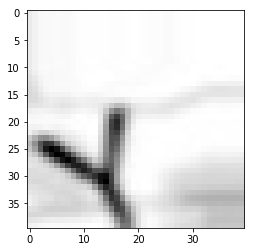

In [175]:
plt.imshow(img, interpolation='nearest', cmap=plt.cm.gray)

In [162]:
res = test_model.predict(img.reshape(-1,40,40,1))

In [163]:
res

array([[0.02741268, 0.02776559, 0.02894875, 0.02876039, 0.02891649,
        0.02982137, 0.02776642, 0.02712759, 0.02892109, 0.02899154,
        0.02928422, 0.02854966, 0.02895372, 0.02849161, 0.02915966,
        0.02756532, 0.0300161 , 0.02880745, 0.02911929, 0.02851778,
        0.0283795 , 0.02822355, 0.02816197, 0.02945782, 0.03048441,
        0.02895823, 0.02859381, 0.02796   , 0.02752955, 0.02914381,
        0.02765793, 0.02894188, 0.02809941, 0.02867618, 0.02683518]],
      dtype=float32)

In [165]:
np.argmax(res)

24

In [172]:
le.inverse_transform([np.argmax(res)]) 

array(['O'], dtype='<U1')